In [21]:
import pandas as pd
import sqlite3

In [34]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Assignment_Log.csv')
df.head()

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
0,06/22/2017 19:59:06,9fcbc63ff4c8bea5cea4efad782c87cf,5.00,5.00,Accepted Job,594bec5c95e2ce005840c23a,06/22/2017 12:12:12,review,1,review,0,13,14,4,6,2,0,1,1
1,06/22/2017 19:59:02,9fcbc63ff4c8bea5cea4efad782c87cf,5.00,5.00,Assigned Job,594bec5c95e2ce005840c23a,06/22/2017 12:12:12,review,1,review,1,13,15,5,6,2,0,1,1
2,06/22/2017 19:51:30,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Declined Job,594bec83fd2cf400280aa965,06/22/2017 12:12:51,writing,9,"sourcing, writing",1,12,12,5,5,1,0,0,1
3,06/22/2017 19:51:01,0e9802516f8a79dd0d45211dd4ee74af,4.50,4.50,Accepted Job,594c1f5cd7e68f0028c9062c,06/22/2017 15:49:48,sourcing,1,"sourcing, writing",1,11,12,5,5,1,0,0,1
4,06/22/2017 19:50:58,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Assigned Job,594bec83fd2cf400280aa965,06/22/2017 12:12:51,writing,8,"sourcing, writing",2,11,14,5,5,2,0,1,1


Employee 'a09c8906073b4c0b75e3100b857b982a' has the most action with 72 events 

In [30]:
df['Analyst'].value_counts()[:5]

a09c8906073b4c0b75e3100b857b982a    72
62060850630c7afe54fd59151413d237    46
642782c690c8d963c487300a4751e220    42
732e4a29b2e318bce3c1e923276ddf51    42
9fcbc63ff4c8bea5cea4efad782c87cf    40
Name: Analyst, dtype: int64

average wait time for a rquest is about 5 min 

In [19]:
df.describe()

,Quality score (sourcing),Quality score (writing),Wait time (min),Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,3.935297,3.935297,5.099874,2.673831,15.214918,8.054362,2.836915,1.628319,1.737042,0.087231,0.385588,1.379267
std,1.869956,1.869956,12.153611,1.870439,4.868065,3.644080,2.802793,1.627581,2.841667,0.295496,0.619714,1.547648
min,0.000000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.400000,4.400000,1.000000,1.000000,11.000000,5.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.830000,4.830000,1.000000,2.000000,14.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,5.000000,2.000000,4.000000,20.000000,11.000000,5.000000,2.000000,2.000000,0.000000,1.000000,2.000000
max,5.000000,5.000000,107.000000,8.000000,25.000000,16.000000,11.000000,7.000000,12.000000,2.000000,4.000000,6.000000


In [36]:
df['Job'].value_counts()

sourcing         211
writing          160
review           143
planning          94
vetting           94
source review     58
editing           31
Name: Job, dtype: int64

**EDA**

In [15]:
#type(df['Event occurred at'][0])
type(df['Request created at'][0])

str

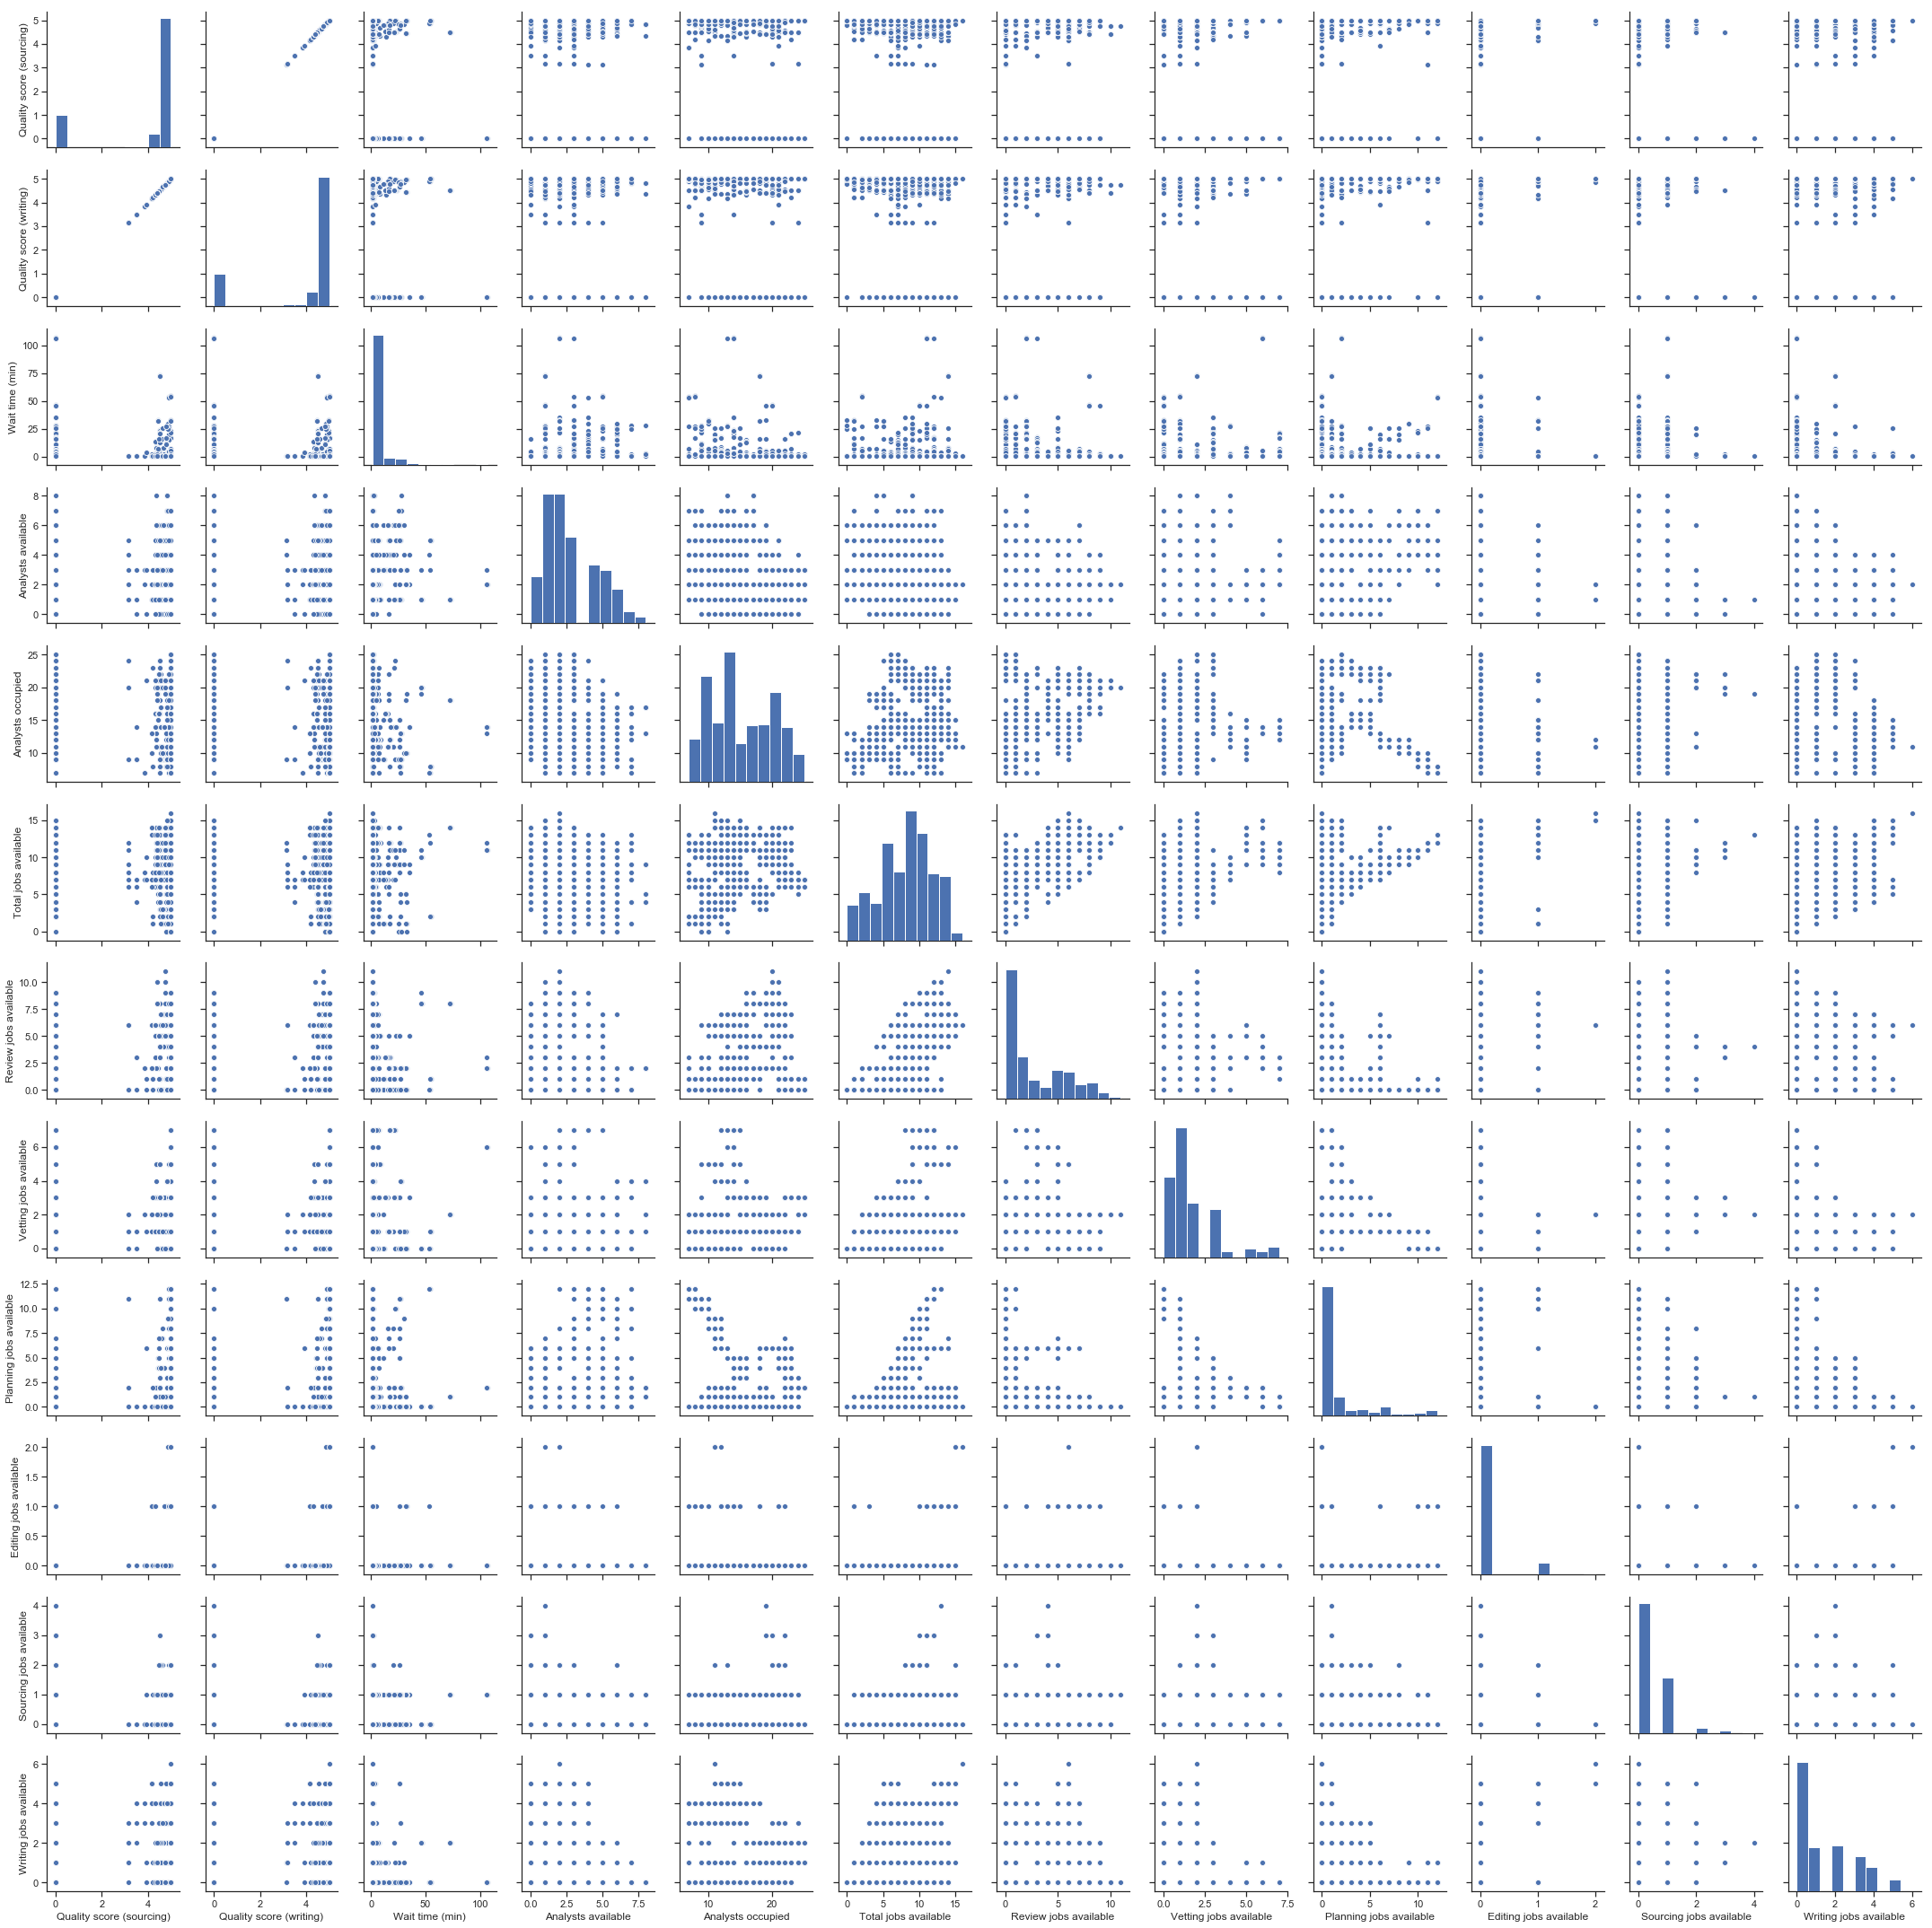

In [35]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)


These two column are duplicates as difference is 0.0 for all rows

In [40]:
check_dup = df['Quality score (sourcing)'] - df['Quality score (writing)']
check_dup.value_counts()

0.0    791
dtype: int64

These rows are duplicated, so would remove 

In [42]:
duplicateRows = df[df.duplicated()]
duplicateRows

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
9,06/22/2017 19:47:03,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Accepted Job,594c1e983b593b00281250ba,06/22/2017 15:46:32,sourcing,4,"sourcing, writing",1,11,11,5,5,1,0,0,0
55,06/22/2017 18:26:42,e2333b2dc03032f12c8526e45243f0c1,0.00,0.00,Accepted Job,594c0b883b593b002812506e,06/22/2017 14:25:12,sourcing,22,sourcing,2,14,9,2,7,0,0,0,0


In [47]:
# duplicateValuesRequest = df.duplicated(['Request'])
# duplicateValuesRequest